# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [ ]:
import csv
import random
import numpy as np
import copy
import math

In [ ]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->
We have bandgap = y = W0 + W1 * x1 + W2 * x2 + W3 * x3 + W4 * x4.
This function must be accommodated.The weight matrix = (W0,W1,W2,W3,W4
). As we have accomodated W0 in the W matrix so we need to to modify X = (X1,X2,X3,X4) to X = (1,X1,X2,X3,X4).  We start by randomly initialising the weights (W0, W1, W2, W3, W4).<br>
The gradient decent is calcuated via matrix algebra. The number of iterations to calcualte W is alreday fixed.The equation is as follows:<br>

A: Contains all data points (in a transposed way as taught in class)

W: Contains all weights

Y: Contains all bandgap

dJ/dW = AᵀAW - AᵀY<br>
W = W - (alpha/n)*(dJ/dW)<br>
The pediction Y=WT*X (where WT is Transpose of W)<br>
Different Learning rates are tested and the MSE is calculated.
The learning rate which gave best MSE is chosen gor prediction.

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [ ]:
# implement Linear Regression
learning_rate = 0.01
def calculate_w(w,a,y):
  at=a.transpose()
  # print(a.shape)
  n=int(a.shape[0])
  # print(n)
  # print(at.shape)
  at_a=(at @ a)
  # print(at_a.shape)
  # print(w.shape)
  prod_1=(at_a @ w)
  # print(prod_1.shape)
  prod_2=(at @ y)
  # print(prod_2.shape)
  grad=np.subtract(prod_1,prod_2) * (1/n)
  ans=np.subtract(w,(learning_rate*grad))
  # print(ans)
  # print(ans.shape)
  # print(ans)
  return ans


class linear_regr:


  def __init__(self,x_training,y):
    dim=len(x_training[0])
    #adding extra element to get bias
    # print(dim)
    # extra=[1] * dim
    # for x in x_training:
    #   x.insert(0,1)
    x_training=copy.deepcopy(x_training)
    x_training=np.array(x_training)
    x_training=np.insert(x_training,(0),1,axis=1)
    # print(x_training)
    xt=x_training.transpose()
    y_t=np.array(y).reshape(len(y),1)
    #setting initial w
    self.w=np.zeros((dim+1,1))
    for i in range(200):
      self.w=calculate_w(self.w , x_training , y_t)

  def predict(self,x_testing):
      wt=copy.deepcopy(self.w)
      wt=wt.transpose()
      # print(wt.shape)
      ans = list()
      x_testing = copy.deepcopy(x_testing)
      for x in x_testing:
        x.insert(0,1)
        temp=np.array(x).reshape(len(x),1)
        # print(temp.shape)
        y = wt @ temp
        # print('y:',y.shape)
        ans.append(y[0][0])
      
      return ans

      



In [ ]:
def calculate_mse(y_t,y_p):
  error = np.subtract(y_t,y_p)
  # size = len(y_t)
  ans=np.square(error)
  return np.mean(ans)

In [ ]:
learning_rates = [0.01,0.05,0.1,0.25,0.5]
mse =  list()
for lr in learning_rates:
  learning_rate = lr
  model=linear_regr(x_train,y_train)
  y_pred=model.predict(x_test)
  calc_mse = calculate_mse(y_test,y_pred)
  mse.append((calc_mse,lr))

mse.sort()
print(mse)
learning_rate = mse[0][1]


[(0.006359609227351906, 0.5), (0.006571673597780744, 0.25), (0.008793681876641736, 0.1), (0.025948954709424325, 0.05), (0.19184967926655522, 0.01)]


2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

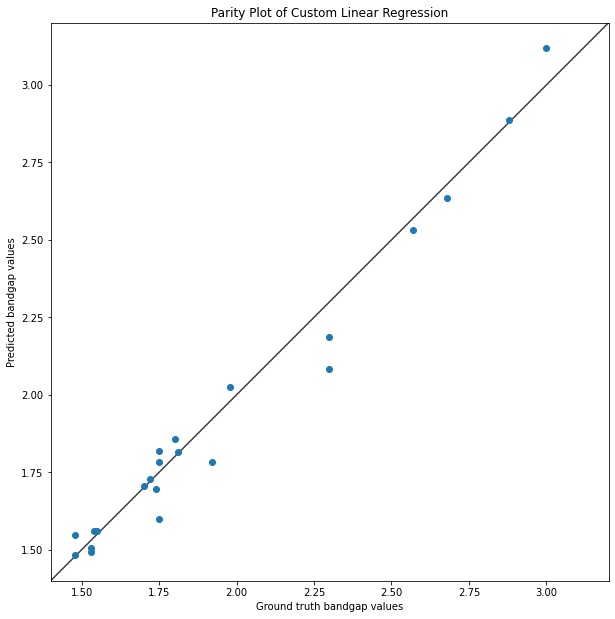

In [ ]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

model=linear_regr(x_train,y_train)
y_pred=model.predict(x_test)

# print(y_pred)
# print(y_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->
Ridge regression is a similar to linear regression but here regularization is also implemented  It's uses L2 Norm for regularization. To avoid overfitting, we employ Ridge regression.
Ridge regression's cost function is as follows:<br>
J(w) of Ridge = J(w) of linear regression + alpha*(Sum of square of weights)


2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

The regularization is a technique which penalizes the features in a model so that only the most important ones are kept. This is especially important when you have a dataset with 100,000 or more features to avoid overfitting.

The regularization parameter is defined by Alpha. The higher the alpha, the more weight is given to regularization. Although increasing alpha increases error minimally, it also helps to minimize overfitting.

When alpha is kept to 0 it is same as no regularization is performed.

In [ ]:
from sklearn.metrics import mean_squared_error
alphas = [0.01, 0.1, 1,5,50,100,1000,3000,10000,50000,100000]

In [ ]:
# # implement Lasso regression and make a table where you explore the effect of 
# # different values of `alpha`

# import sklearn

# # implement Lasso regression and make a table where you explore the effect of 
# # different values of `alpha`

# def calculate_w_ridge(w,a,y,alpha):
#   at=a.transpose()
#   # print(a.shape)
#   n=int(a.shape[0])
#   # print(n)
#   # print(at.shape)
#   at_a=(at @ a)
#   # print(at_a.shape)
#   # print(w.shape)
#   prod_1=(at_a @ w)
#   # print(prod_1.shape)
#   prod_2=(at @ y)
#   # print(prod_2.shape)
#   grad=np.subtract(prod_1,prod_2) * (1/n)

#   # reg = list()

#   # for weight in w:
#   #   if weight>0:
#   #     reg.append(alpha)
#   #   else:
#   #     reg.append(-1 * alpha)
  
#   # reg = np.array(reg).reshape((w.shape[0],1))

#   reg = (2 * alpha) * w

#   grad = np.add(grad , reg)

#   ans=np.subtract(w,(learning_rate*grad))
#   # print(ans)
#   # print(ans.shape)
#   # print(ans)
#   return ans

# class ridge:
#   def __init__(self,x_training,y,alpha):
#     dim=len(x_training[0])
#     #adding extra element to get bias
#     # print(dim)
#     # extra=[1] * dim
#     # for x in x_training:
#     #   x.insert(0,1)
#     x_training=copy.deepcopy(x_training)
#     x_training=np.array(x_training)
#     x_training=np.insert(x_training,(0),1,axis=1)
#     # print(x_training)
#     xt=x_training.transpose()
#     y_t=np.array(y).reshape(len(y),1)
#     #setting initial w
#     self.w=np.ones((dim+1,1))
#     for i in range(400):
#       self.w=calculate_w_ridge(self.w , x_training , y_t, alpha)
  
#   def predict(self,x_testing):
#       wt=copy.deepcopy(self.w)
#       wt=wt.transpose()
#       # print(wt.shape)
#       ans = list()
#       x_testing = copy.deepcopy(x_testing)
#       for x in x_testing:
#         x.insert(0,1)
#         temp=np.array(x).reshape(len(x),1)
#         # print(temp.shape)
#         y = wt @ temp
#         # print('y:',y.shape)
#         ans.append(y[0][0])
      
#       return ans

from sklearn.linear_model import Ridge


ridge_alpha = list()

for alpha in alphas:
  model = Ridge(alpha=alpha)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  ans = mean_squared_error(y_test, y_pred)
  ans = math.sqrt(ans)
  ridge_alpha.append(ans)

      


[]

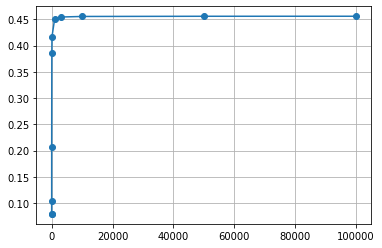

In [ ]:
plt.plot(alphas[:] ,ridge_alpha[:] ,marker ='o')
plt.grid()
plt.plot()

In [ ]:
# model=ridge(x_train,y_train,0.01)
# y_pred=model.predict(x_test)

# # print(y_pred)
# # print(y_test)

# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(10,20))

# ax.scatter(y_test, y_pred)

# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),
#     np.max([ax.get_xlim(), ax.get_ylim()]),
# ]
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# ax.set_ylim(lims)

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->
Lasso regression is a similar to linear regression but here regularization is also implemented  It's uses L1 Norm for regularization. To avoid overfitting, and for feature selection we employ Lasso regression as it make redundant weights to 0.
Lasso regression's cost function is as follows:<br>
J(w) of Lasso = J(w) of linear regression + alpha*(Sum of |weights|)

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

The regularization is a technique which penalizes the features in a model so that only the most important ones are kept. This is especially important when you have a dataset with 100,000 or more features to avoid overfitting.

The regularization parameter is defined by Alpha. The higher the alpha, the more weight is given to regularization. Although increasing alpha increases error minimally, it also helps to minimize overfitting.

When alpha is kept to 0 it is same as no regularization is performed.

In [ ]:
# # you should not have imported sklearn before this point
# import sklearn

# # implement Lasso regression and make a table where you explore the effect of 
# # different values of `alpha`

# def calculate_w_lasso(w,a,y,alpha):
#   at=a.transpose()
#   # print(a.shape)
#   n=int(a.shape[0])
#   # print(n)
#   # print(at.shape)
#   at_a=(at @ a)
#   # print(at_a.shape)
#   # print(w.shape)
#   prod_1=(at_a @ w)
#   # print(prod_1.shape)
#   prod_2=(at @ y)
#   # print(prod_2.shape)
#   grad=np.subtract(prod_1,prod_2) * (1/n)

#   reg = list()

#   for weight in w:
#     if weight>0:
#       reg.append(alpha)
#     else:
#       reg.append(-1 * alpha)
  
#   reg = np.array(reg).reshape((w.shape[0],1))

#   grad = np.add(grad , reg)

#   ans=np.subtract(w,(learning_rate*grad))
#   # print(ans)
#   # print(ans.shape)
#   # print(ans)
#   return ans

# class lasso:
#   def __init__(self,x_training,y,alpha):
#     dim=len(x_training[0])
#     #adding extra element to get bias
#     # print(dim)
#     # extra=[1] * dim
#     # for x in x_training:
#     #   x.insert(0,1)
#     x_training=copy.deepcopy(x_training)
#     x_training=np.array(x_training)
#     x_training=np.insert(x_training,(0),1,axis=1)
#     # print(x_training)
#     xt=x_training.transpose()
#     y_t=np.array(y).reshape(len(y),1)
#     #setting initial w
#     self.w=np.ones((dim+1,1))
#     for i in range(400):
#       self.w=calculate_w_lasso(self.w , x_training , y_t, alpha)
  
#   def predict(self,x_testing):
#       wt=copy.deepcopy(self.w)
#       wt=wt.transpose()
#       # print(wt.shape)
#       ans = list()
#       x_testing = copy.deepcopy(x_testing)
#       for x in x_testing:
#         x.insert(0,1)
#         temp=np.array(x).reshape(len(x),1)
#         # print(temp.shape)
#         y = wt @ temp
#         # print('y:',y.shape)
#         ans.append(y[0][0])
      
#       return ans

from sklearn.linear_model import Lasso


lasso_alpha = list()

for alpha in alphas:
  model = Lasso(alpha=alpha)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  ans = mean_squared_error(y_test, y_pred)
  ans = math.sqrt(ans)
  lasso_alpha.append(ans)



[]

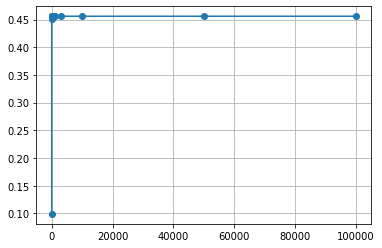

In [ ]:
plt.plot(alphas [:],lasso_alpha[:] ,marker ='o') 
plt.grid()
plt.plot()

In [ ]:
# model=lasso(x_train,y_train,0.01)
# y_pred=model.predict(x_test)

# # print(y_pred)
# # print(y_test)

# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(10,20))

# ax.scatter(y_test, y_pred)

# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),
#     np.max([ax.get_xlim(), ax.get_ylim()]),
# ]
# ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlim(lims)
# ax.set_ylim(lims)